In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Irish data

In [2]:
#reading in the Irish dataset
dfIe = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/EHQ10/CSV/1.0/en')
dfIe

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02741V03309,Sub Sector,UNIT,VALUE
0,EHQ10C01,Employment,20081,2008Q1,01,Civil service,Number,41700.00
1,EHQ10C01,Employment,20081,2008Q1,02,Defence,Number,11200.00
2,EHQ10C01,Employment,20081,2008Q1,03,Garda Siochana,Number,14900.00
3,EHQ10C01,Employment,20081,2008Q1,04,Education,Number,116100.00
4,EHQ10C01,Employment,20081,2008Q1,05,Regional bodies,Number,38900.00
...,...,...,...,...,...,...,...,...
5363,EHQ10C08,Average hourly total labour costs,20231,2023Q1,07,Semi-State companies,Euro,37.35
5364,EHQ10C08,Average hourly total labour costs,20231,2023Q1,09,Commercial Semi-State companies,Euro,37.74
5365,EHQ10C08,Average hourly total labour costs,20231,2023Q1,10,Non commercial Semi-State companies,Euro,36.47
5366,EHQ10C08,Average hourly total labour costs,20231,2023Q1,-,Total Public Sector including Semi State bodies,Euro,37.64


In [3]:
# removing white spaces from column names
dfIe.rename(columns={"Sub Sector": "Sub_Sector"}, inplace=True)
dfIe.rename(columns={"Statistic Label": "Statistic_Label"}, inplace=True)

In [4]:
dfIe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        5368 non-null   object 
 1   Statistic_Label  5368 non-null   object 
 2   TLIST(Q1)        5368 non-null   int64  
 3   Quarter          5368 non-null   object 
 4   C02741V03309     5368 non-null   object 
 5   Sub_Sector       5368 non-null   object 
 6   UNIT             5368 non-null   object 
 7   VALUE            5368 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 335.6+ KB


In [5]:
dfIe['Statistic_Label'].unique()

array(['Employment', 'Average Weekly Earnings', 'Average Hourly Earnings',
       'Average Hourly Earnings excluding Irregular Earnings',
       'Average Weekly Paid Hours', 'Average hourly irregular earnings',
       'Average hourly other labour costs',
       'Average hourly total labour costs'], dtype=object)

In [6]:
dfIe['TLIST(Q1)'].unique()

array([20081, 20082, 20083, 20084, 20091, 20092, 20093, 20094, 20101,
       20102, 20103, 20104, 20111, 20112, 20113, 20114, 20121, 20122,
       20123, 20124, 20131, 20132, 20133, 20134, 20141, 20142, 20143,
       20144, 20151, 20152, 20153, 20154, 20161, 20162, 20163, 20164,
       20171, 20172, 20173, 20174, 20181, 20182, 20183, 20184, 20191,
       20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211, 20212,
       20213, 20214, 20221, 20222, 20223, 20224, 20231], dtype=int64)

In [7]:
dfIe['C02741V03309'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '09', '10', '-', '08'],
      dtype=object)

In [8]:
dfIe['Sub_Sector'].unique()

array(['Civil service', 'Defence', 'Garda Siochana', 'Education',
       'Regional bodies', 'Health', 'Semi-State companies',
       'Commercial Semi-State companies',
       'Non commercial Semi-State companies',
       'Total Public Sector including Semi State bodies',
       'Total Public Sector excluding Semi State bodies'], dtype=object)

In [9]:
dfIe['UNIT'].unique()

array(['Number', 'Euro', 'Hours'], dtype=object)

In [10]:
dfIe['VALUE'].unique()

array([4.170e+04, 1.120e+04, 1.490e+04, ..., 3.774e+01, 3.764e+01,
       3.768e+01])

In [11]:
dfIe.describe()

,TLIST(Q1),VALUE
count,5368.000000,5368.000000
mean,20153.786885,13814.342345
std,44.011593,58776.196299
min,20081.000000,0.090000
25%,20114.000000,18.382500
50%,20153.000000,29.825000
75%,20192.000000,238.287500
max,20231.000000,450000.000000


In [12]:
dfIe.describe(include='object')

,STATISTIC,Statistic_Label,Quarter,C02741V03309,Sub_Sector,UNIT
count,5368,5368,5368,5368,5368,5368
unique,8,8,61,11,11,3
top,EHQ10C01,Employment,2008Q1,01,Civil service,Euro
freq,671,671,88,488,488,4026


In [13]:
#converting quarters to datetime data type
dfIe['Quarter'] = pd.to_datetime(dfIe['Quarter'])
dfIe['Quarter']

0      2008-01-01
1      2008-01-01
2      2008-01-01
3      2008-01-01
4      2008-01-01
          ...    
5363   2023-01-01
5364   2023-01-01
5365   2023-01-01
5366   2023-01-01
5367   2023-01-01
Name: Quarter, Length: 5368, dtype: datetime64[ns]

In [14]:
#setting quarter column as index. Inplace to save memory
dfIe.set_index('Quarter', inplace=True)

In [15]:
dfIe

,STATISTIC,Statistic_Label,TLIST(Q1),C02741V03309,Sub_Sector,UNIT,VALUE
Quarter,,,,,,,
2008-01-01,EHQ10C01,Employment,20081,01,Civil service,Number,41700.00
2008-01-01,EHQ10C01,Employment,20081,02,Defence,Number,11200.00
2008-01-01,EHQ10C01,Employment,20081,03,Garda Siochana,Number,14900.00
2008-01-01,EHQ10C01,Employment,20081,04,Education,Number,116100.00
2008-01-01,EHQ10C01,Employment,20081,05,Regional bodies,Number,38900.00
...,...,...,...,...,...,...,...
2023-01-01,EHQ10C08,Average hourly total labour costs,20231,07,Semi-State companies,Euro,37.35
2023-01-01,EHQ10C08,Average hourly total labour costs,20231,09,Commercial Semi-State companies,Euro,37.74
2023-01-01,EHQ10C08,Average hourly total labour costs,20231,10,Non commercial Semi-State companies,Euro,36.47


#### Plotting Irish data

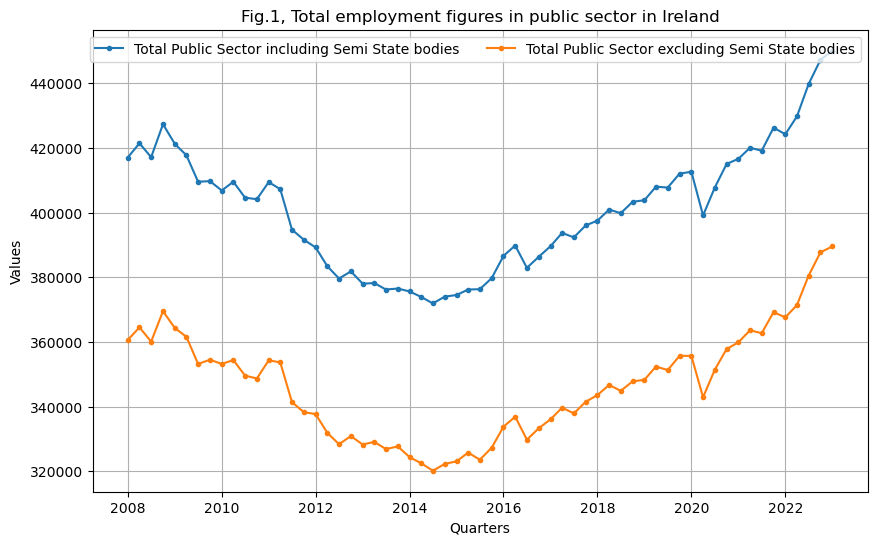

In [23]:
#selecting rows from df where Statistic_Label is value Employment
dfIe_employment = dfIe[dfIe['Statistic_Label'] == 'Employment']

# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining group with total figures
totalsEmployIE_group = ['Total Public Sector including Semi State bodies', 'Total Public Sector excluding Semi State bodies']

# looping through the group created 
for subsector in totalsEmployIE_group:
    df_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Values')
plt.title('Fig.1, Total employment figures in public sector in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='best', ncol=2) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

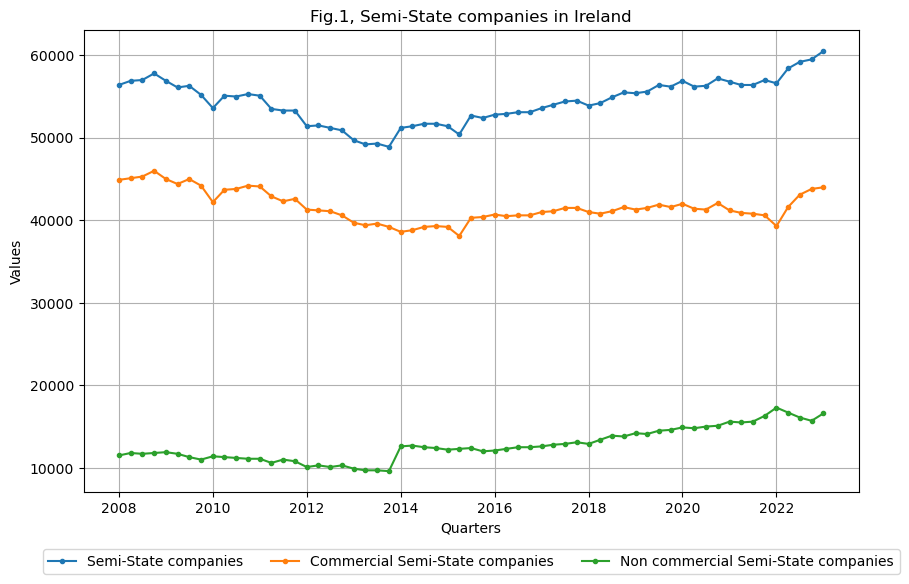

In [21]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining semi-state companies group
semiState_group = ['Semi-State companies', 'Commercial Semi-State companies', 'Non commercial Semi-State companies']

# looping through semiState_group 
for subsector in semiState_group:
    df_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Values')
plt.title('Fig.1, Semi-State companies in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

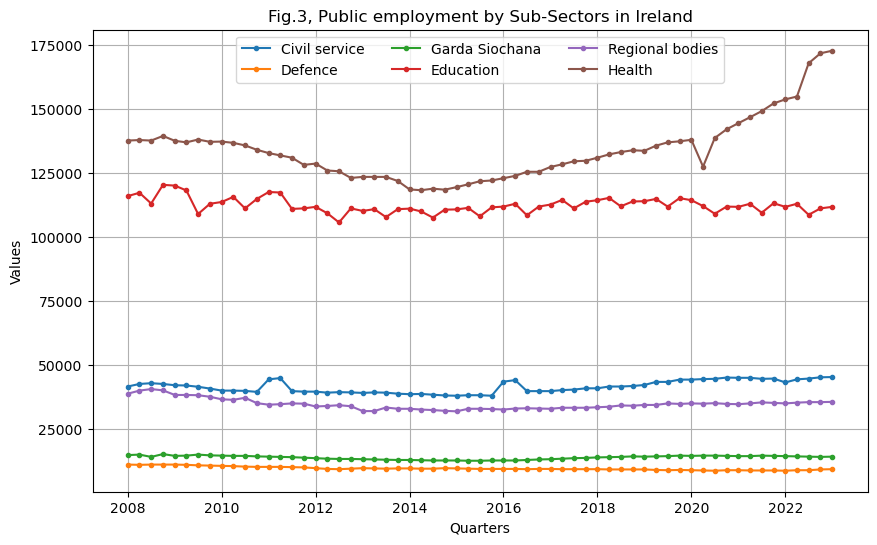

In [22]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining subsectors
subsectors = ['Civil service', 'Defence', 'Garda Siochana', 'Education', 'Regional bodies', 'Health']

#Looping through the Sub_Sectors in the group 
for subsector in subsectors:
    dfIe_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(dfIe_subsector.index, dfIe_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Values')
plt.title('Fig.3, Public employment by Sub-Sectors in Ireland')
plt.grid(True)

# Put the legend in the background
ax.legend(loc='upper center', ncol=3)

plt.show()

### UK data

In [26]:
dfUK = pd.read_csv('pse.csv',skiprows=7,usecols=[i for i in range(46)]) # taking first 46 columns only

In [27]:
dfUK

,1991,2333,3070,5403,582,5985,593,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,593.1,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,1992,2348,3018,5366,544,5910,609,NaN,NaN,NaN,...,NaN,609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,2529,2787,5316,515,5830,601,NaN,NaN,NaN,...,NaN,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,2470,2752,5222,446,5668,578,NaN,NaN,NaN,...,NaN,578.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995,2417,2757,5174,433,5607,555,NaN,NaN,NaN,...,NaN,555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996,2379,2732,5111,395,5506,538,NaN,NaN,NaN,...,NaN,538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022 Q1,3550,2003,5553,194,5747,512,3116.0,1562.0,4678.0,...,5733.0,512.0,35.0,157.0,272.0,1140.0,1497.0,1874.0,212.0,543.0
155,2022 Q2,3550,1995,5545,194,5740,512,3108.0,1557.0,4666.0,...,5741.0,512.0,34.0,156.0,272.0,1143.0,1499.0,1883.0,213.0,543.0
156,2022 Q3,3576,1985,5561,197,5758,513,3146.0,1555.0,4702.0,...,5769.0,513.0,34.0,155.0,274.0,1148.0,1501.0,1899.0,213.0,548.0
157,2022 Q4,3602,1999,5601,198,5799,515,3152.0,1565.0,4718.0,...,5802.0,515.0,34.0,154.0,276.0,1154.0,1503.0,1918.0,211.0,550.0


In [28]:
#renaming columns
dfUK.columns=['Year','Central_Gov','Local_Gov','Total_General_Gov','Total_Public_Corps','Total_Public_Sector','Civil_Service','Central_Gov','Loca_Gov','Total_General_Gov','Total_Public_Corps','Total_Public_Sector','Civil_Service','Construction', 'HM_Forces', 'Police', 'Public_Admin', 'Education', 'NHS', 'Other_Health_&_Social', 'Other_Public_Sector', 'HM_Forces', 'Police', 'Public_Admin', 'Education', 'NHS', 'Other_Health_&_Social', 'Other_Public_Sector','Private_Sector_Emloyment','Total_Employment','Perc_Public','Perc_Private','Central_Gov-bySector', 'Local_Gov-bySector', 'Total_General_Gov-bySector', 'Total_Public_Corp-bySector', 'Total_Public_Sector-bySector', 'Civil_Service-bySector', 'Construction-ByIndustry', 'HM_Forces-ByIndustry', 'Police-ByIndustry', 'Public_Admin-ByIndustry', 'Education-ByIndustry', 'NHS-ByIndustry', 'Other_Health_&_Social-ByIndustry', 'Other_Public_Sector-ByIndustry']

In [29]:
dfUK

,Year,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Central_Gov,Loca_Gov,Total_General_Gov,...,Total_Public_Sector-bySector,Civil_Service-bySector,Construction-ByIndustry,HM_Forces-ByIndustry,Police-ByIndustry,Public_Admin-ByIndustry,Education-ByIndustry,NHS-ByIndustry,Other_Health_&_Social-ByIndustry,Other_Public_Sector-ByIndustry
0,1992,2348,3018,5366,544,5910,609,NaN,NaN,NaN,...,NaN,609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,2529,2787,5316,515,5830,601,NaN,NaN,NaN,...,NaN,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,2470,2752,5222,446,5668,578,NaN,NaN,NaN,...,NaN,578.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995,2417,2757,5174,433,5607,555,NaN,NaN,NaN,...,NaN,555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996,2379,2732,5111,395,5506,538,NaN,NaN,NaN,...,NaN,538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022 Q1,3550,2003,5553,194,5747,512,3116.0,1562.0,4678.0,...,5733.0,512.0,35.0,157.0,272.0,1140.0,1497.0,1874.0,212.0,543.0
155,2022 Q2,3550,1995,5545,194,5740,512,3108.0,1557.0,4666.0,...,5741.0,512.0,34.0,156.0,272.0,1143.0,1499.0,1883.0,213.0,543.0
156,2022 Q3,3576,1985,5561,197,5758,513,3146.0,1555.0,4702.0,...,5769.0,513.0,34.0,155.0,274.0,1148.0,1501.0,1899.0,213.0,548.0
157,2022 Q4,3602,1999,5601,198,5799,515,3152.0,1565.0,4718.0,...,5802.0,515.0,34.0,154.0,276.0,1154.0,1503.0,1918.0,211.0,550.0


In [30]:
dfUK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              159 non-null    object 
 1   Central_Gov                       159 non-null    int64  
 2   Local_Gov                         159 non-null    int64  
 3   Total_General_Gov                 159 non-null    int64  
 4   Total_Public_Corps                159 non-null    int64  
 5   Total_Public_Sector               159 non-null    int64  
 6   Civil_Service                     159 non-null    int64  
 7   Central_Gov                       121 non-null    float64
 8   Loca_Gov                          121 non-null    float64
 9   Total_General_Gov                 121 non-null    float64
 10  Total_Public_Corps                121 non-null    float64
 11  Total_Public_Sector               121 non-null    float64
 12  Civil_Se

In [31]:
dfUK.describe()

,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Central_Gov,Loca_Gov,Total_General_Gov,Total_Public_Corps,...,Total_Public_Sector-bySector,Civil_Service-bySector,Construction-ByIndustry,HM_Forces-ByIndustry,Police-ByIndustry,Public_Admin-ByIndustry,Education-ByIndustry,NHS-ByIndustry,Other_Health_&_Social-ByIndustry,Other_Public_Sector-ByIndustry
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,128.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2400.490566,2201.962264,4602.459119,335.484277,4937.949686,427.899371,2469.553719,1900.495868,4370.066116,359.644628,...,5789.578512,496.414062,56.586777,185.702479,260.231405,1147.454545,1536.223140,1521.958678,325.256198,756.446281
std,1038.225835,967.110088,1910.311790,199.311151,2057.705890,182.723704,299.139682,243.065839,196.439504,147.028504,...,322.304249,49.297990,22.362420,25.119927,19.295837,91.913909,76.034256,180.497848,67.190343,173.607121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1973.000000,1541.000000,3977.000000,144.000000,...,5343.000000,416.000000,34.000000,152.000000,225.000000,1002.000000,1382.000000,1173.000000,209.000000,498.000000
25%,2377.500000,2012.000000,5141.000000,196.000000,5412.000000,432.000000,2329.000000,1632.000000,4242.000000,303.000000,...,5499.000000,447.500000,38.000000,158.000000,247.000000,1065.000000,1491.000000,1443.000000,278.000000,628.000000
50%,2734.000000,2680.000000,5231.000000,358.000000,5607.000000,505.000000,2430.000000,2004.000000,4336.000000,339.000000,...,5733.000000,510.500000,46.000000,193.000000,261.000000,1163.000000,1515.000000,1515.000000,359.000000,775.000000
75%,2873.000000,2845.500000,5567.500000,395.000000,5989.500000,528.000000,2617.000000,2131.000000,4518.000000,370.000000,...,6029.000000,530.000000,74.000000,212.000000,274.000000,1215.000000,1603.000000,1613.000000,373.000000,808.000000
max,3643.000000,3070.000000,5783.000000,732.000000,6480.000000,609.000000,3203.000000,2195.000000,4775.000000,678.000000,...,6461.000000,609.000000,112.000000,223.000000,296.000000,1287.000000,1686.000000,1937.000000,406.000000,1132.000000


In [32]:
dfUK.describe(include=object)

,Year
count,159
unique,159
top,1992
freq,1


In [33]:
dfUK['Year'].unique()

array(['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '1991 Q2',
       '1991 Q3', '1991 Q4', '1992 Q1', '1992 Q2', '1992 Q3', '1992 Q4',
       '1993 Q1', '1993 Q2', '1993 Q3', '1993 Q4', '1994 Q1', '1994 Q2',
       '1994 Q3', '1994 Q4', '1995 Q1', '1995 Q2', '1995 Q3', '1995 Q4',
       '1996 Q1', '1996 Q2', '1996 Q3', '1996 Q4', '1997 Q1', '1997 Q2',
       '1997 Q3', '1997 Q4', '1998 Q1', '1998 Q2', '1998 Q3', '1998 Q4',
       '1999 Q1', '1999 Q2', '1999 Q3', '1999 Q4', '2000 Q1', '2000 Q2',
       '2000 Q3', '2000 Q4', '2001 Q1', '2001 Q2', '2001 Q3', '2001 Q4',
       '2002 Q1', '2002 Q2', '2002 Q3', '2002 Q4', '2003 Q1', '2003 Q2',
       '2003 Q3', '2003 Q4', '2004 Q1', '2004 Q2', '2004 Q3', '2004 Q4',
       '2005 Q1', '2005 Q2', '2005 Q3', '2005 Q4', '2006

## SPAIN

In [34]:
#!pip install chardet

In [35]:
# Checking the encoding type of the file with chardet due to UnicodeDecodeError 'utf-8' 
import chardet
with open('4262bscSPAIN.csv', 'rb') as file: # reading the file in binary mode
    raw_data = file.read()

chardet.detect(raw_data) #detecting encoding

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [36]:
dfSP = pd.read_csv('4262bscSPAIN.csv',encoding="ISO-8859-1",delimiter=';', quotechar='"') #need to specify delimiter and quotechar, to indicate that the fields containing the delimiter character are quoted with double quotes, like one single string
dfSP

,Sexo,Comunidades y Ciudades Autónomas,Tipo de sector,Periodo,Total
0,Ambos sexos,Total Nacional,Empleo público,2023T1,"3.523,9"
1,Ambos sexos,Total Nacional,Empleo público,2022T4,"3.526,2"
2,Ambos sexos,Total Nacional,Empleo público,2022T3,"3.506,2"
3,Ambos sexos,Total Nacional,Empleo público,2022T2,"3.453,9"
4,Ambos sexos,Total Nacional,Empleo público,2022T1,"3.468,2"
...,...,...,...,...,...
5095,Mujeres,19 Melilla,Empleo público,2003T1,"4,3"
5096,Mujeres,19 Melilla,Empleo público,2002T4,"4,1"
5097,Mujeres,19 Melilla,Empleo público,2002T3,"4,5"
5098,Mujeres,19 Melilla,Empleo público,2002T2,"4,0"


In [37]:
dfSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo                              5100 non-null   object
 1   Comunidades y Ciudades Autónomas  5100 non-null   object
 2   Tipo de sector                    5100 non-null   object
 3   Periodo                           5100 non-null   object
 4   Total                             5100 non-null   object
dtypes: object(5)
memory usage: 199.3+ KB


In [38]:
dfSP.describe()

,Sexo,Comunidades y Ciudades Autónomas,Tipo de sector,Periodo,Total
count,5100,5100,5100,5100,5100
unique,3,20,1,85,2386
top,Ambos sexos,Total Nacional,Empleo público,2023T1,"4,1"
freq,1700,255,5100,60,16


In [41]:
dfSP['Periodo'].unique()

array(['2023T1', '2022T4', '2022T3', '2022T2', '2022T1', '2021T4',
       '2021T3', '2021T2', '2021T1', '2020T4', '2020T3', '2020T2',
       '2020T1', '2019T4', '2019T3', '2019T2', '2019T1', '2018T4',
       '2018T3', '2018T2', '2018T1', '2017T4', '2017T3', '2017T2',
       '2017T1', '2016T4', '2016T3', '2016T2', '2016T1', '2015T4',
       '2015T3', '2015T2', '2015T1', '2014T4', '2014T3', '2014T2',
       '2014T1', '2013T4', '2013T3', '2013T2', '2013T1', '2012T4',
       '2012T3', '2012T2', '2012T1', '2011T4', '2011T3', '2011T2',
       '2011T1', '2010T4', '2010T3', '2010T2', '2010T1', '2009T4',
       '2009T3', '2009T2', '2009T1', '2008T4', '2008T3', '2008T2',
       '2008T1', '2007T4', '2007T3', '2007T2', '2007T1', '2006T4',
       '2006T3', '2006T2', '2006T1', '2005T4', '2005T3', '2005T2',
       '2005T1', '2004T4', '2004T3', '2004T2', '2004T1', '2003T4',
       '2003T3', '2003T2', '2003T1', '2002T4', '2002T3', '2002T2',
       '2002T1'], dtype=object)

In [42]:
dfSP['Tipo de sector'].unique()

array(['Empleo público'], dtype=object)

In [43]:
dfSP['Comunidades y Ciudades Autónomas'].unique()

array(['Total Nacional', '01 Andalucía', '02 Aragón',
       '03 Asturias, Principado de', '04 Balears, Illes', '05 Canarias',
       '06 Cantabria', '07 Castilla y León', '08 Castilla - La Mancha',
       '09 Cataluña', '10 Comunitat Valenciana', '11 Extremadura',
       '12 Galicia', '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)